In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
cambodia_file = r'Game Data\joinedDataCambodia.csv'
vietnam_file = r'Game Data\joinedDataVietnam.csv'
merged_file = r'Game Data\mergedData.csv'

sensitivity_folder=r'Sensitivity Analysis'
regression_folder=r'OLS Regression'

clusters_folder="Clusters"
subsidy_max=10

cambodia_csv = pd.read_csv(os.path.join(directory, cambodia_file), engine="python")
vietnam_csv = pd.read_csv(os.path.join(directory, vietnam_file), engine='python')
merged_csv = pd.read_csv(os.path.join(directory, merged_file), engine='python')

countries=['Vietnam', 'Cambodia']

metrics_title=['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches',
 'Non-HS Strategy',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches',
 'HS Strategy'
 ]

metrics=['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches (%)',
 'Non-HS Strategy (%)',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches (%)',
 'HS Strategy (%)']

metrics_extended =['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches',
 'Non-HS Strategy Adoption',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches',
 'Strategy Switches',
 'Switches to NCH Strategy',
 'Popular Strategy Adoption',
#  'HS Cells (Non-NCH Strategy)',
#  'HS Cells (NCH Strategy)',
 'NCH Patches (HS Strategy)',
 'NCH Patches (Non-HS Strategy)',
 'NCH Efficiency (HS Strategy)',
 'NCH Efficiency (Non-HS Strategy)',
 ]

metrics_extended_label =['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches (%)',
 'Non-HS Strategy Adoption (%)',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches (%)',
 'Strategy Switches',
 'Switches to NCH Strategy',
 'Popular Strategy Adoption (%)',
#  'HS Cells (Non-NCH Strategy)',
#  'HS Cells (NCH Strategy)',
 'NCH Patches (HS Strategy) (%)',
 'NCH Patches (Non-HS Strategy) (%)',
 'NCH Efficiency (HS Strategy)',
 'NCH Efficiency (Non-HS Strategy)',
 ]

set_percent_inds=[2, 3, 6, 9, 10, 11]

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def to_percentage(x, pos):
    return f'{x * 100:.0f}%'
def to_percentage_decimal(x, pos):
    return f'{x * 100:.1f}%'

# data processing (needs to be run before generating figures)

In [2]:
df=pd.read_csv(join(directory, sensitivity_folder, 'farm_size_analysis.csv'))

data=dict()

country = "Vietnam"
data[country]=list()

x_ind=1
repetitions = 50
indent=5

subsidy_max=10

ind=0
prev_ind=ind
while ind < len(df) and df['country'].iloc[ind+1]==country:
    ind+=1

full_list=df.iloc[prev_ind:ind+1, 8:].T
for i in range(len(full_list)):
    for j in range(len(full_list.columns)):
        full_list.iloc[i, j]=full_list.iloc[i, j][1:-1].split(" ")

for subsidy in range(subsidy_max+1):
    temp=full_list.copy()
    for i in range(len(full_list)):
        for j in range(len(full_list.columns)):
            temp.iloc[i, j]=float(full_list.iloc[i, j][subsidy])

    temp2=pd.DataFrame(columns=np.unique(df.iloc[prev_ind:ind+1, x_ind].values), index=[_ for _ in range(len(temp))])
    for metric in range(len(temp)):
        for i in range(int(len(temp.columns)/repetitions)):
            temp2.iloc[metric, i]=temp.iloc[metric, i*repetitions:(i+1)*repetitions].mean()

    data[country].append(temp2)

country = "Cambodia"
data[country]=list()

ind+=1

prev_ind=ind
ind=len(df)

full_list=df.iloc[prev_ind:ind+1, 8:].T
for i in range(len(full_list)):
    for j in range(len(full_list.columns)):
        full_list.iloc[i, j]=full_list.iloc[i, j][1:-1].split(" ")

for subsidy in range(subsidy_max+1):
    temp=full_list.copy()
    for i in range(len(full_list)):
        for j in range(len(full_list.columns)):
            temp.iloc[i, j]=float(full_list.iloc[i, j][subsidy])

    temp2=pd.DataFrame(columns=np.unique(df.iloc[prev_ind:ind+1, x_ind].values), index=[_ for _ in range(len(temp))])
    for metric in range(len(temp)):
        for i in range(int(len(temp.columns)/repetitions)):
            temp2.iloc[metric, i]=temp.iloc[metric, i*repetitions:(i+1)*repetitions].mean()

    data[country].append(temp2)

# adjust font size for figures

In [16]:
plt.rcParams.update({'font.size': 16}) # label font size
title_size=18 # title font size
padding_title_size=20 # padding between title and rest of figure
legend_size=14 # size of legend text

[0.014797806146572104, 0.015921134751773047, 0.017875139479905433, 0.021471092198581548, 0.030988557919621733, 0.06787555555555555, 0.1776503073286052, 0.3059481418439716, 0.4526787328605202, 0.5455841513002365, 0.5454687470449174]
0.06787555555555555
[0.014542827423167853, 0.014538780141843973, 0.014708463356974, 0.015780501182033096, 0.019090458628841598, 0.02679761702127659, 0.08283188652482272, 0.2692630165484633, 0.3151688321513002, 0.4879978439716312, 0.5801377210401891]
0.08283188652482272


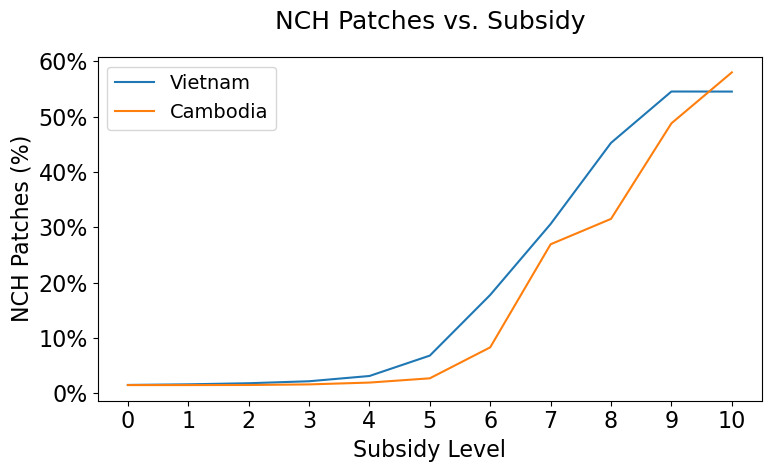

In [56]:
country = "Vietnam"

for i in [2]:
    plt.figure(figsize=[8, 5])  
    temp=[]

    for subsidy in range(0, subsidy_max+1):
        plt_arr=np.array(data[country][subsidy].iloc[i])
        temp.append(np.mean(plt_arr))
    plt.plot([subsidy for subsidy in range(0, subsidy_max+1)], temp, label=country)

print(temp)
print(temp[5])
    
country = "Cambodia"
for i in [2]:
    temp=[]

    for subsidy in range(0, subsidy_max+1):
        plt_arr=np.array(data[country][subsidy].iloc[i])
        temp.append(np.mean(plt_arr))
    plt.plot([subsidy for subsidy in range(0, subsidy_max+1)], temp, label=country)
print(temp)
print(temp[6])

plt.ylabel(metrics[i])
plt.xlabel("Subsidy Level")
plt.xticks(np.linspace(0, 10, 11))
plt.title(metrics_extended[i] + " vs. Subsidy", fontsize=title_size, pad=padding_title_size)
plt.legend(fontsize=legend_size)

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))

plt.tight_layout()
plt.savefig(join(directory, 'Figures', 'NCH_vs_subsidy.png'), dpi=1200, bbox_inches='tight')

# full lineplots

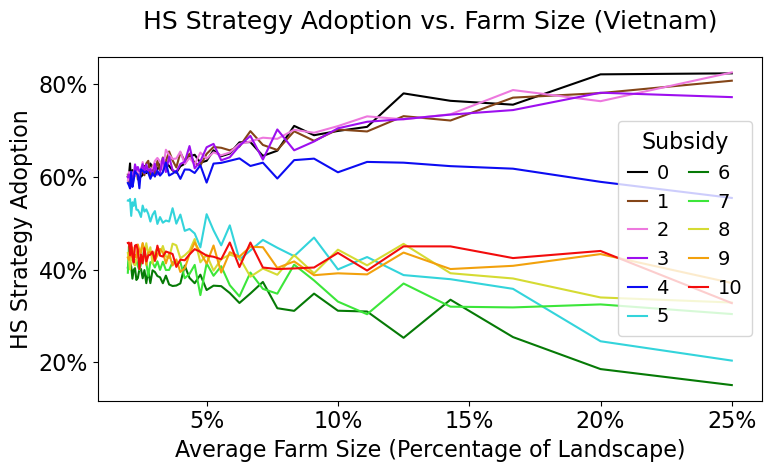

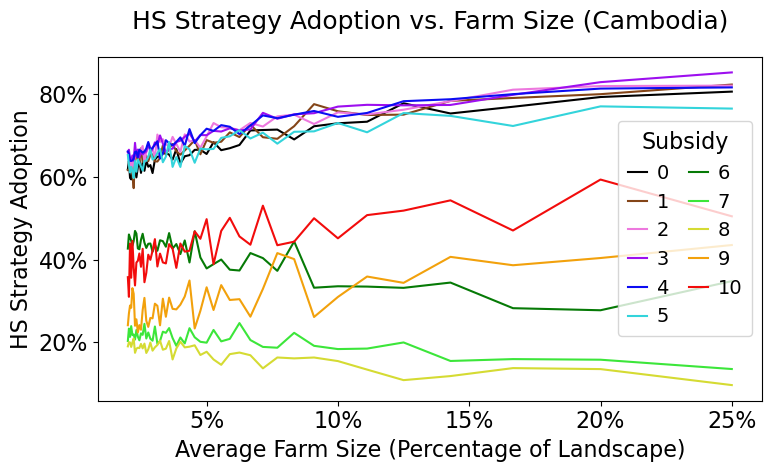

In [17]:
# HS strategy adoption

import matplotlib.colors as mcolors

country = "Vietnam"
original_colors = ['#000000', '#8B4513', '#fa78e9', '#a103fc', '#0000ff', '#2cdfe6', 
                   '#008000', '#36f233', '#e0e62c', '#FFA500', '#FF0000']
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Function to adjust brightness and saturation
def adjust_color(color, saturation_factor=0.95, value_factor=0.95):
    hsv = mcolors.rgb_to_hsv(color[:3])
    hsv[1] *= saturation_factor
    hsv[2] *= value_factor
    return mcolors.hsv_to_rgb(hsv)

colors = [adjust_color(hex_to_rgb(color)) for color in original_colors]

name='HS Strategy Adoption'

for country in countries:
    plt.figure(figsize=[8, 5])  

    for subsidy in range(0, subsidy_max+1):
        curr_data=1-data[country][subsidy].iloc[3]
        plt_arr=np.array(curr_data)
        plt.plot(data[country][subsidy].columns, plt_arr, label=subsidy, color=colors[subsidy])
        
    plt.ylabel(name)
    plt.xlabel("Average Farm Size (Percentage of Landscape)")
    plt.title(name + " vs. Farm Size" +" ("+country+")", fontsize=title_size, pad=padding_title_size)
    plt.legend(ncol=2, title="Subsidy", columnspacing=1, handletextpad=0.5, 
                borderpad=0.5, handlelength=1, fontsize=legend_size)


    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percentage))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.tight_layout()
    plt.savefig(join(directory, 'Figures', country+'_lineplots', name+'.png'), dpi=1200, bbox_inches='tight')
plt.show()

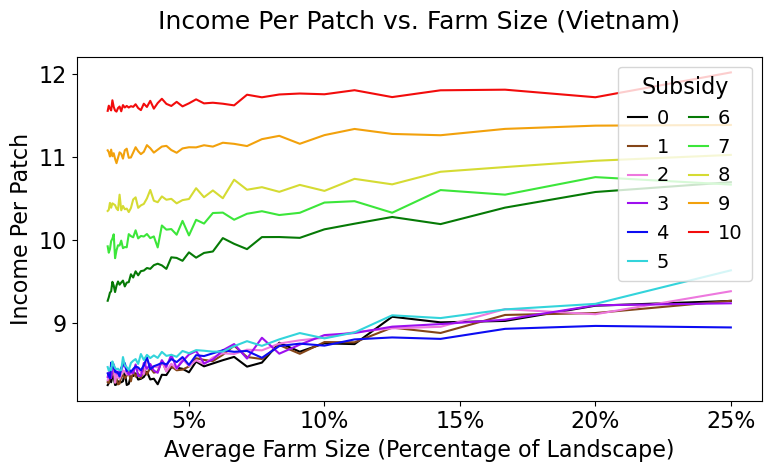

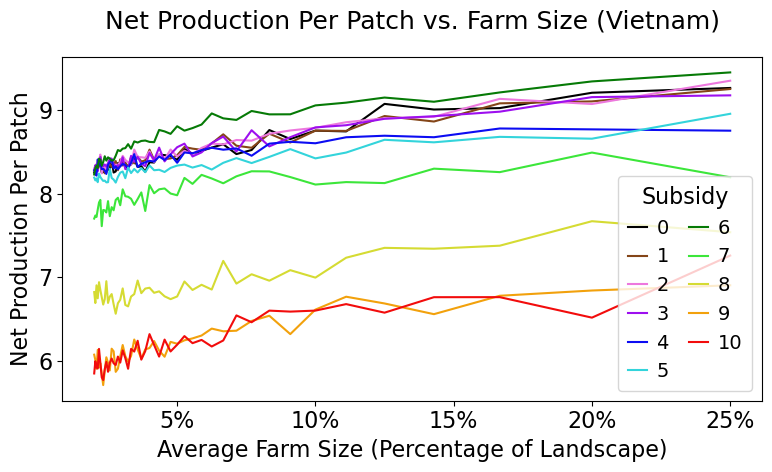

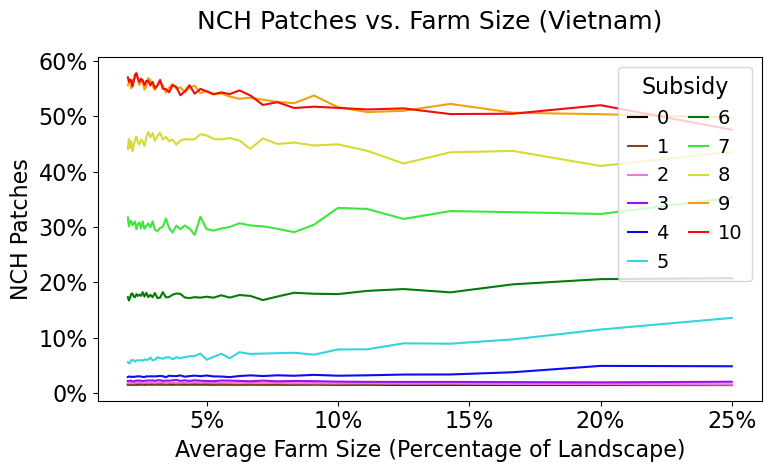

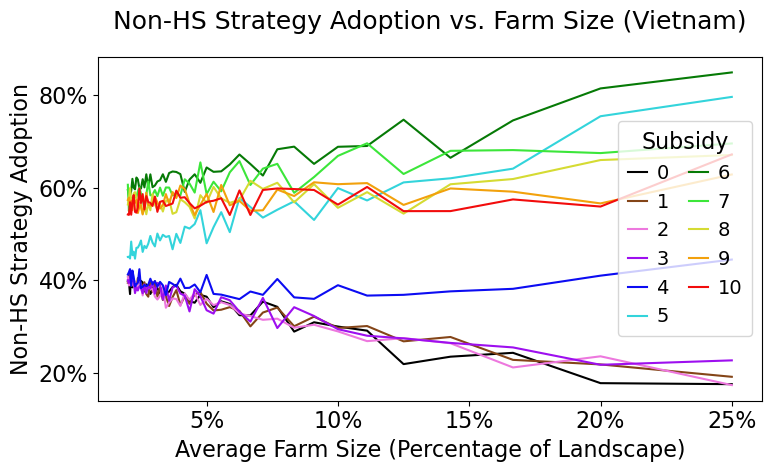

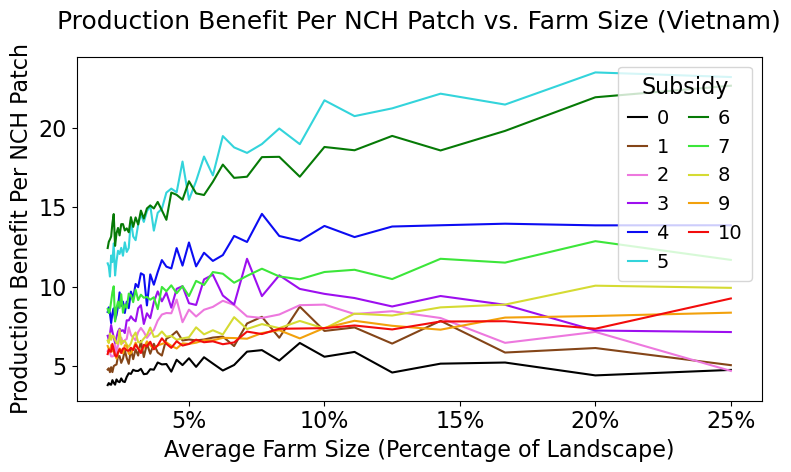

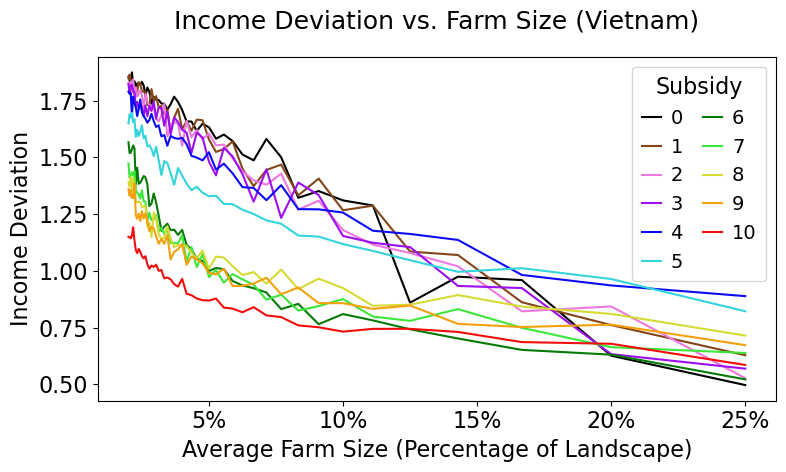

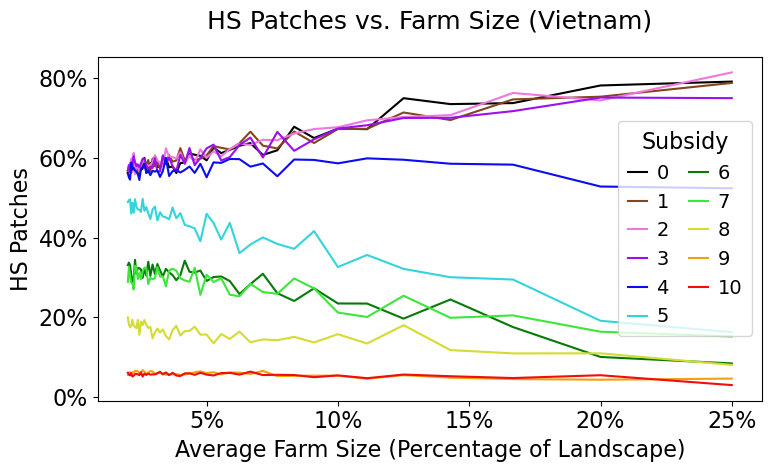

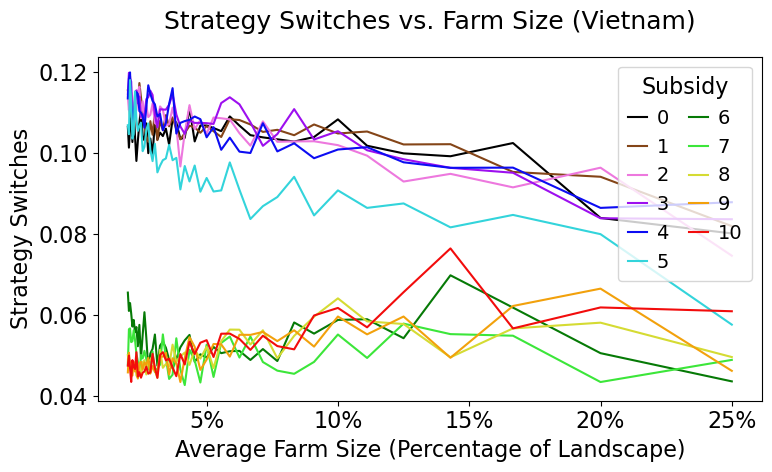

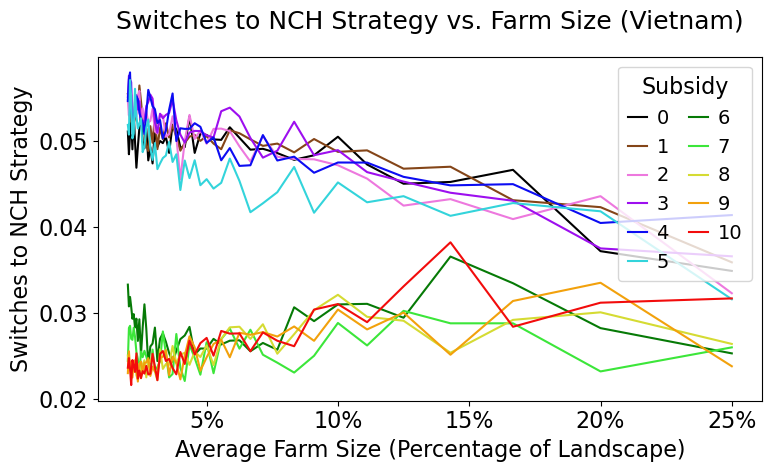

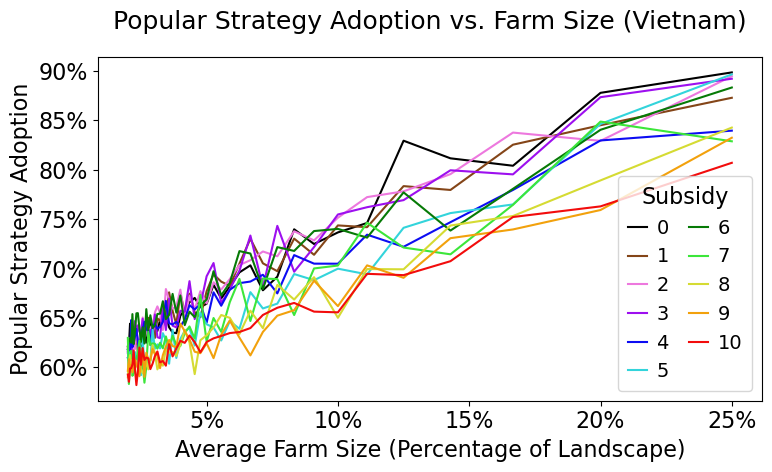

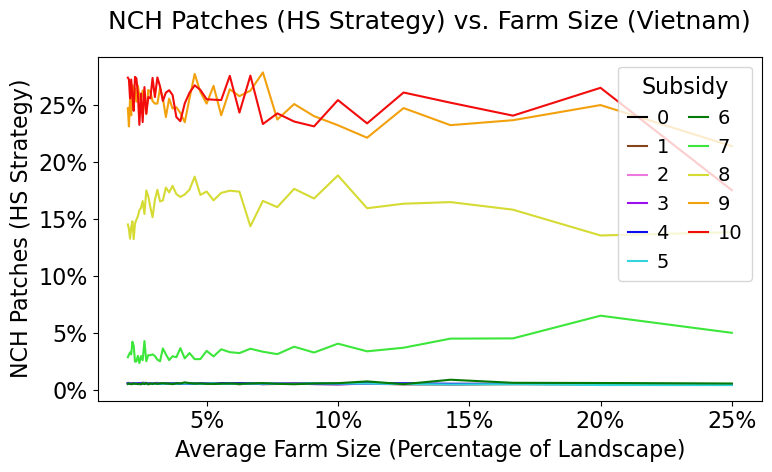

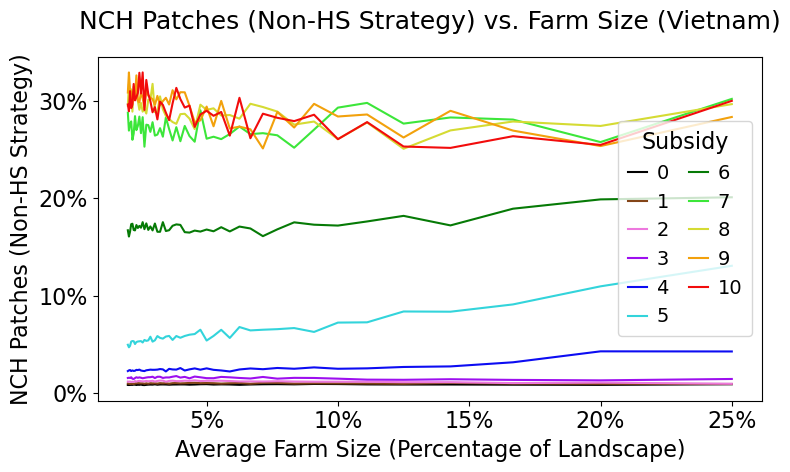

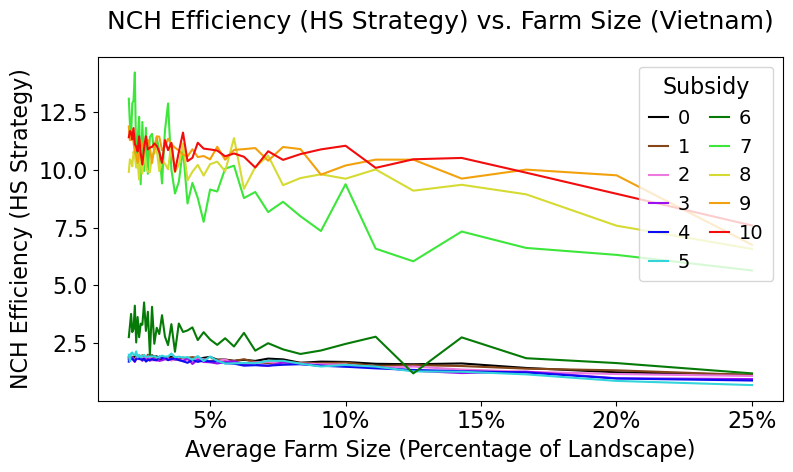

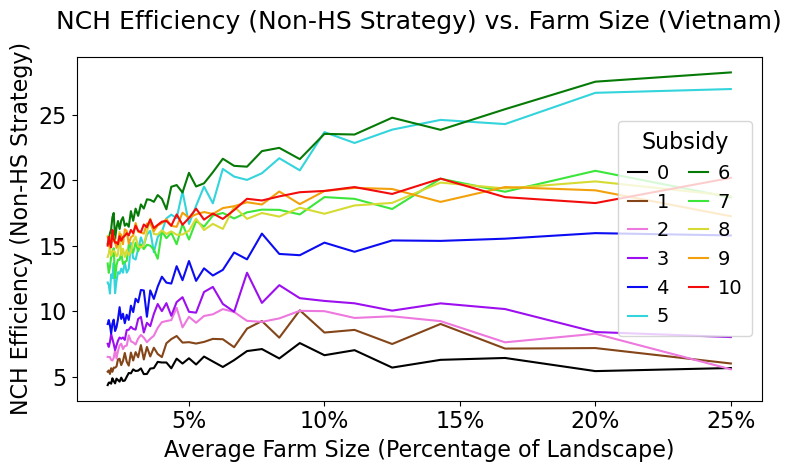

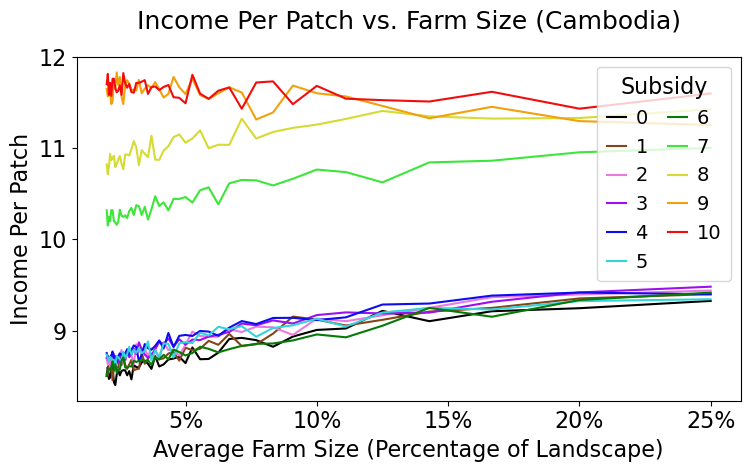

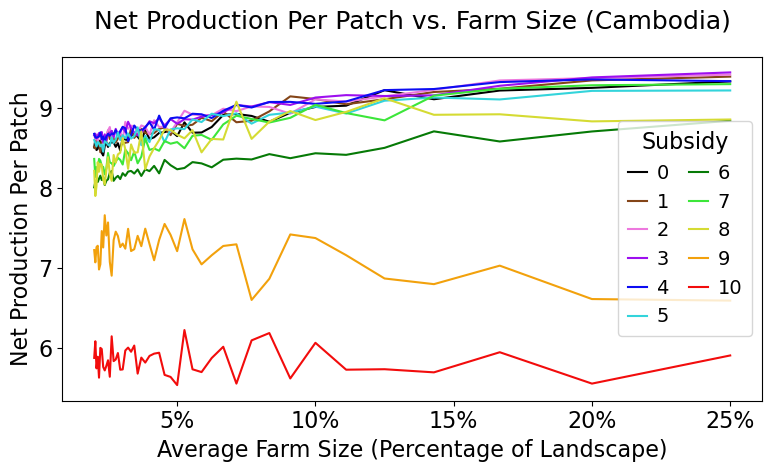

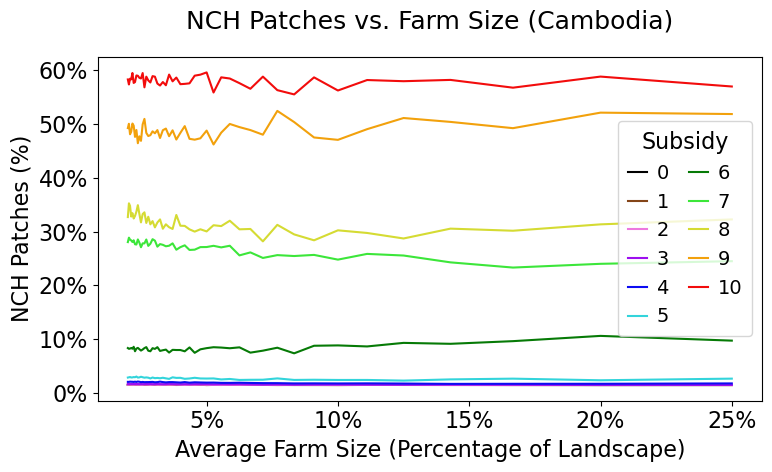

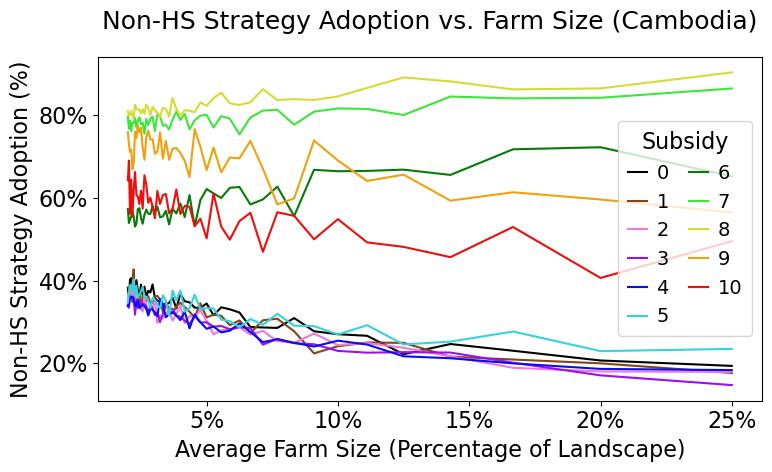

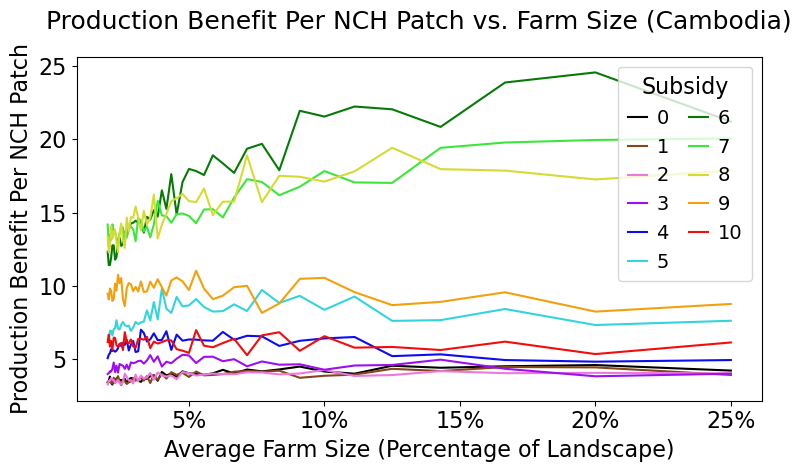

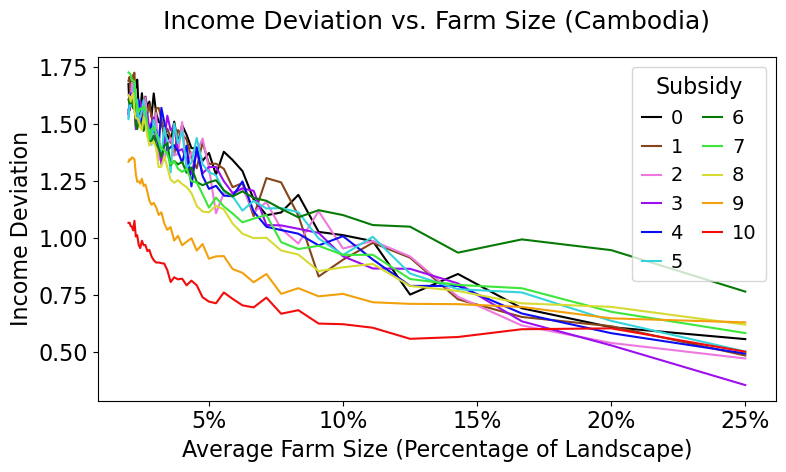

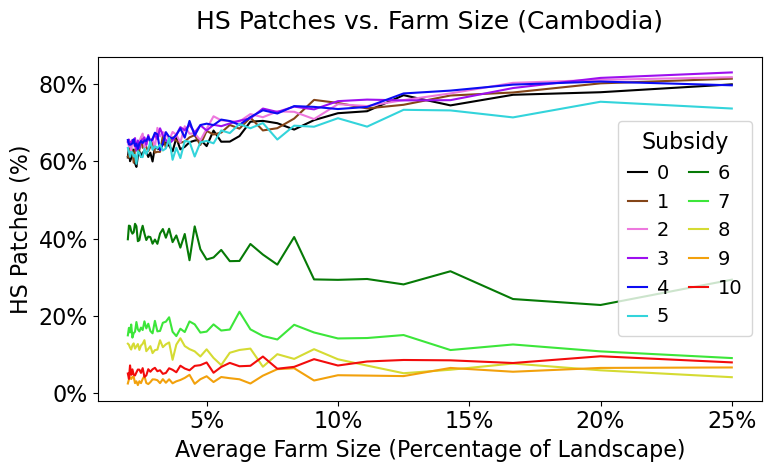

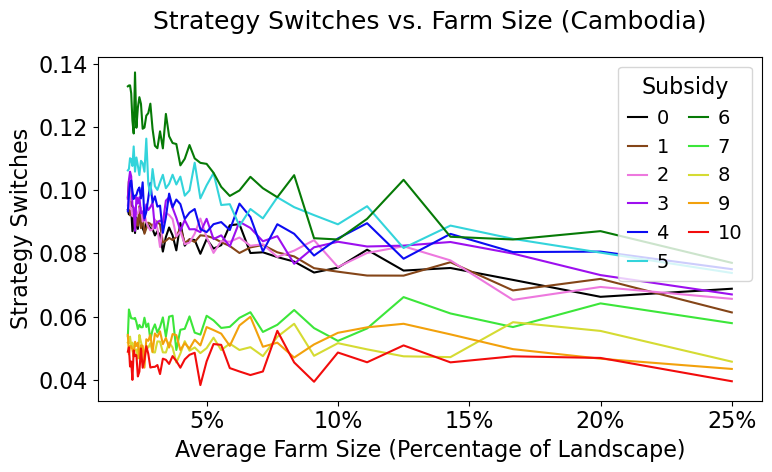

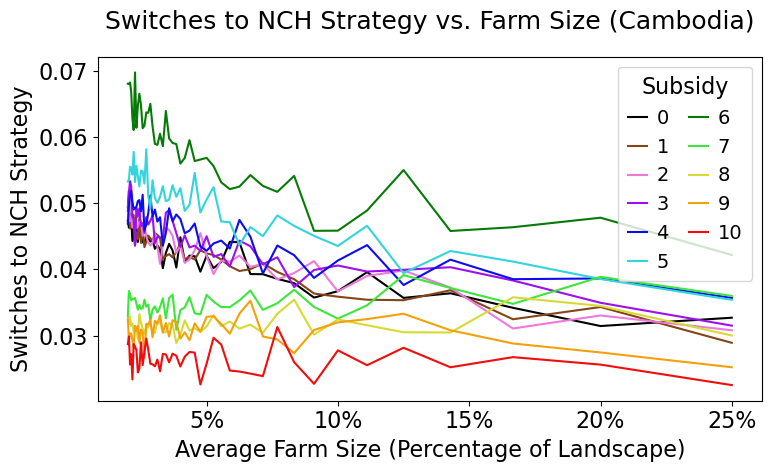

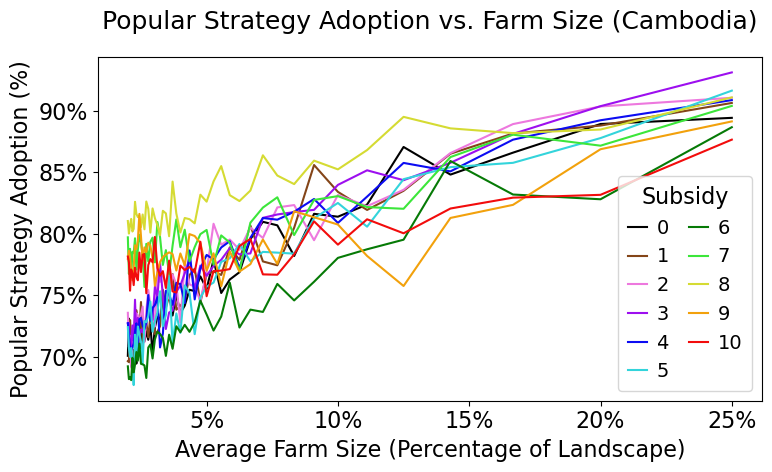

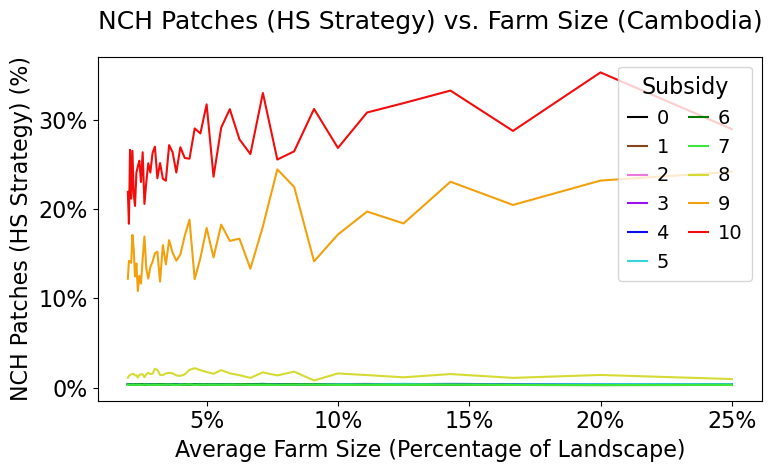

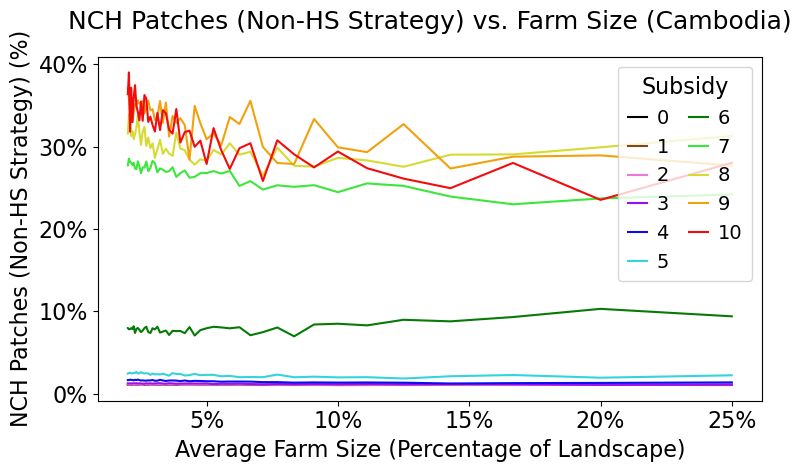

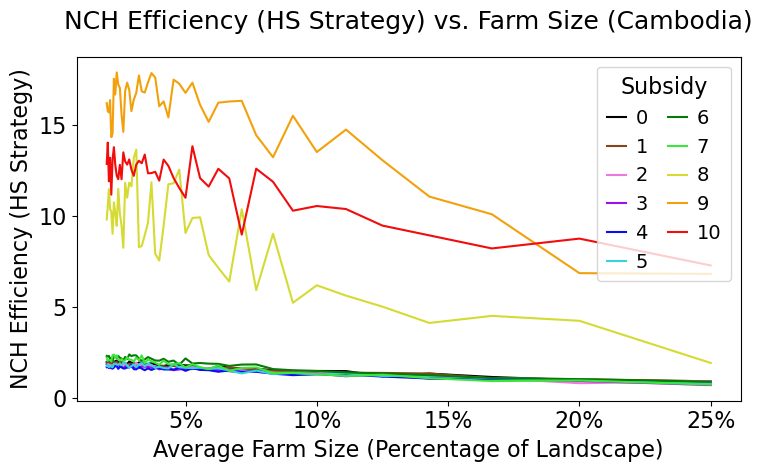

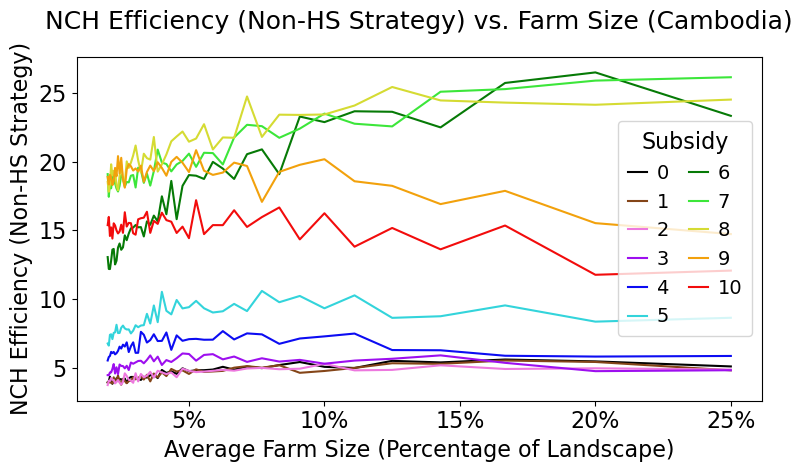

In [4]:
import matplotlib.colors as mcolors

country = "Vietnam"
original_colors = ['#000000', '#8B4513', '#fa78e9', '#a103fc', '#0000ff', '#2cdfe6', 
                   '#008000', '#36f233', '#e0e62c', '#FFA500', '#FF0000']
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Function to adjust brightness and saturation
def adjust_color(color, saturation_factor=0.95, value_factor=0.95):
    hsv = mcolors.rgb_to_hsv(color[:3])
    hsv[1] *= saturation_factor
    hsv[2] *= value_factor
    return mcolors.hsv_to_rgb(hsv)

colors = [adjust_color(hex_to_rgb(color)) for color in original_colors]

for i in range(len(data[country][0])):
    plt.figure(figsize=[8, 5])  

    for subsidy in range(0, subsidy_max+1):
        plt_arr=np.array(data[country][subsidy].iloc[i])
        plt.plot(data[country][subsidy].columns, plt_arr, label=subsidy, color=colors[subsidy])
        
    # ADJUST TEXT
    plt.ylabel(metrics_extended[i])
    plt.xlabel("Average Farm Size (Percentage of Landscape)")
    plt.title(metrics_extended[i] + " vs. Farm Size" +" ("+country+")", fontsize=title_size, pad=padding_title_size)
    plt.legend(ncol=2, title="Subsidy", columnspacing=1, handletextpad=0.5, 
               borderpad=0.5, handlelength=1, fontsize=legend_size)


    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percentage))
    if i in set_percent_inds:
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.tight_layout()
    plt.savefig(join(directory, 'Figures', country+'_lineplots', metrics_extended[i]+'.png'), dpi=1200, bbox_inches='tight')


country = "Cambodia"
for i in range(len(data[country][0])):
    plt.figure(figsize=[8, 5])  

    for subsidy in range(0, subsidy_max+1):
        plt_arr=np.array(data[country][subsidy].iloc[i])
        plt.plot(data[country][subsidy].columns, plt_arr, label=subsidy, color=colors[subsidy])
        
    # ADJUST TEXT
    plt.ylabel(metrics_extended_label[i])
    plt.xlabel("Average Farm Size (Percentage of Landscape)")
    plt.title(metrics_extended[i] + " vs. Farm Size" +" ("+country+")", fontsize=title_size, pad=padding_title_size)
    plt.legend(ncol=2, title="Subsidy", columnspacing=1, handletextpad=0.5, 
               borderpad=0.5, handlelength=1, fontsize=legend_size)

    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percentage))
    if i in set_percent_inds:
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.tight_layout()
    plt.savefig(join(directory, 'Figures', country+'_lineplots', metrics_extended[i]+'.png'), dpi=1200, bbox_inches='tight')

plt.show()

# full heatmaps

# adjust font size for heatmaps

In [18]:
plt.rcParams.update({'font.size': 16}) # label font size
title_size=18 # title font size
padding_title_size=20 # padding between title and rest of figure

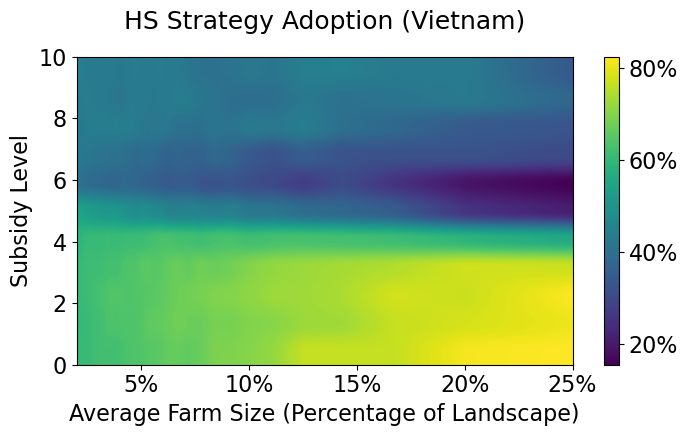

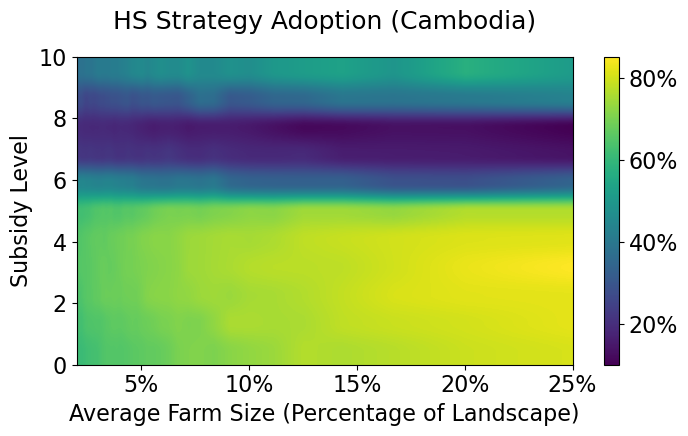

In [19]:
# HS strategy adoption
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
subsidy_max=10

name='HS Strategy Adoption'

for country in countries:
    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        curr_data=1-data[country][subsidy].loc[3]
        temp.loc[subsidy]=curr_data.astype('float64').tolist()

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()

    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=0.01)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), subsidy_max+1)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    # ADJUST FIGURE SIZE
    plt.figure(figsize=[8,4])

    #ADJUST HEATMAP COLORS
    # im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
    #               aspect='auto', cmap='your chosen color map')
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                aspect='auto')
    cbar = plt.colorbar(im)

    # ADJUST FIGURE TEXT
    plt.title(name +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Average Farm Size (Percentage of Landscape)")
    plt.ylabel("Subsidy Level")
    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percentage))
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.savefig(join(directory, 'Figures', country+'_heatmaps', name+'.png'), dpi=600, bbox_inches='tight')

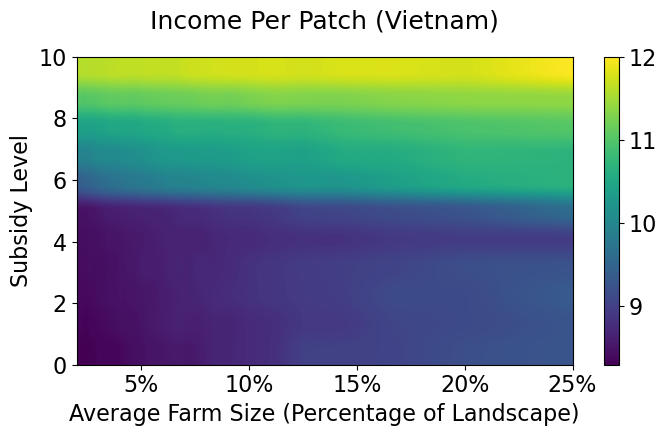

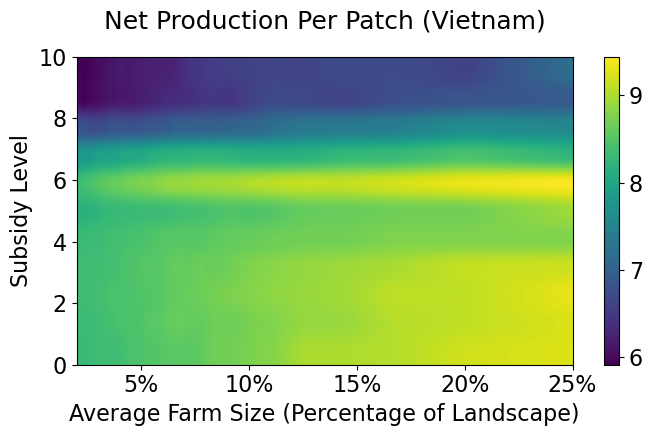

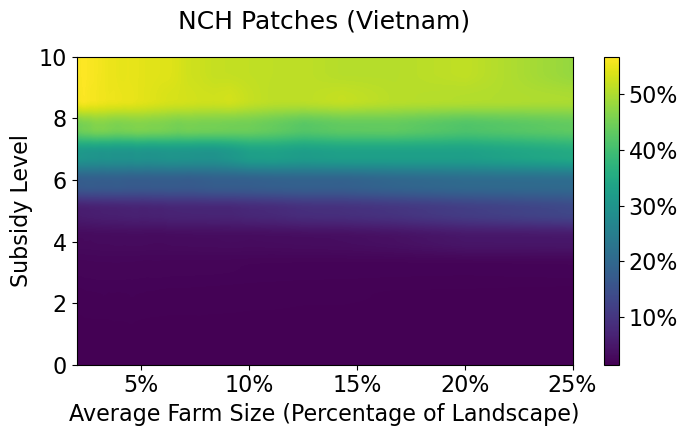

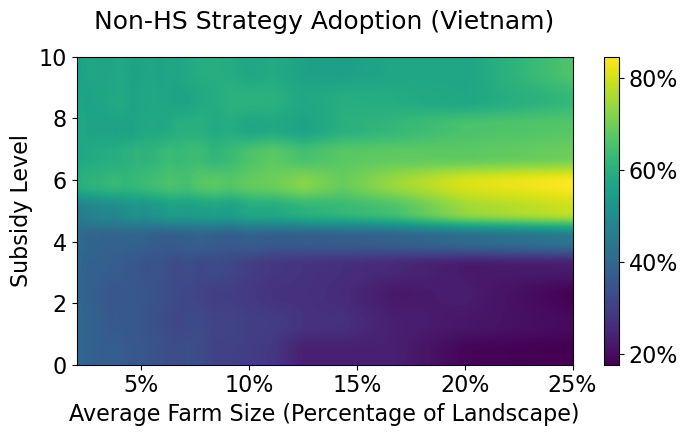

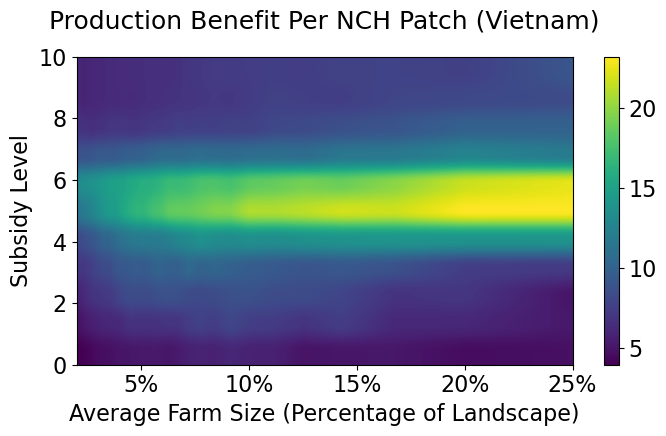

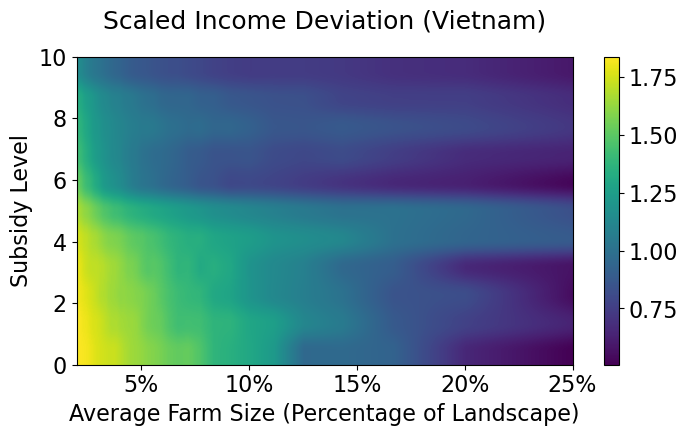

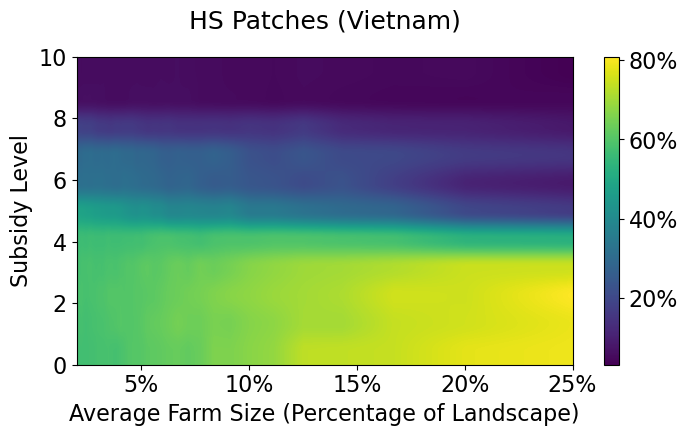

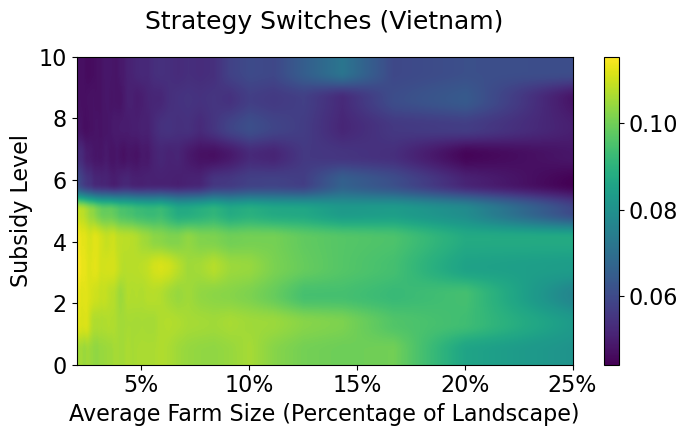

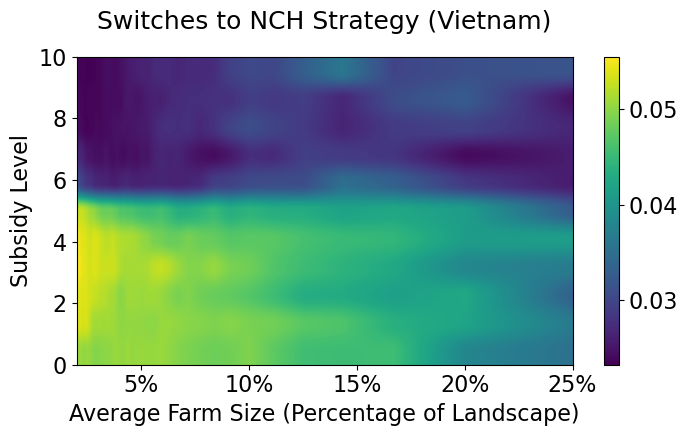

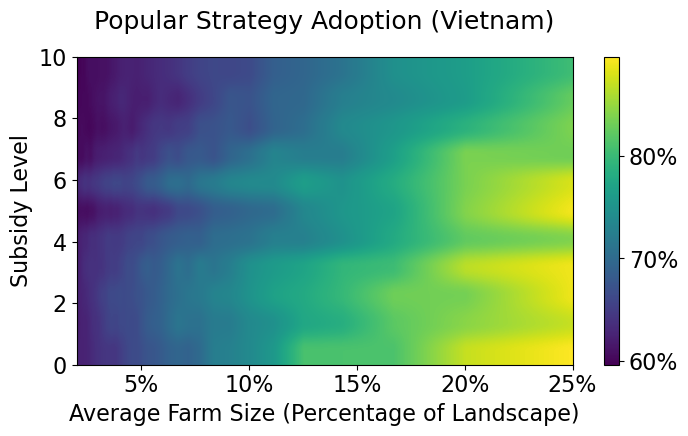

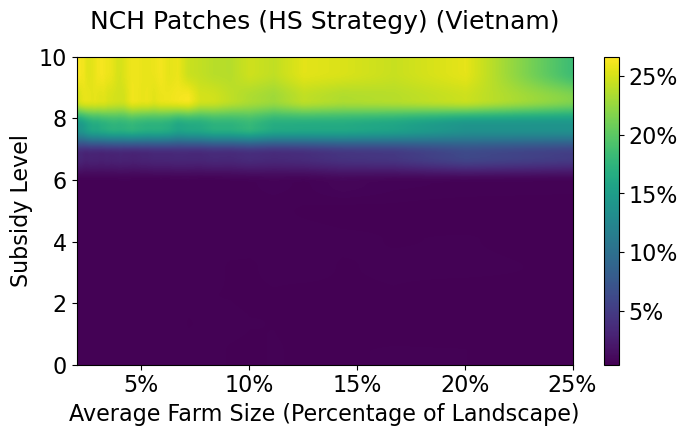

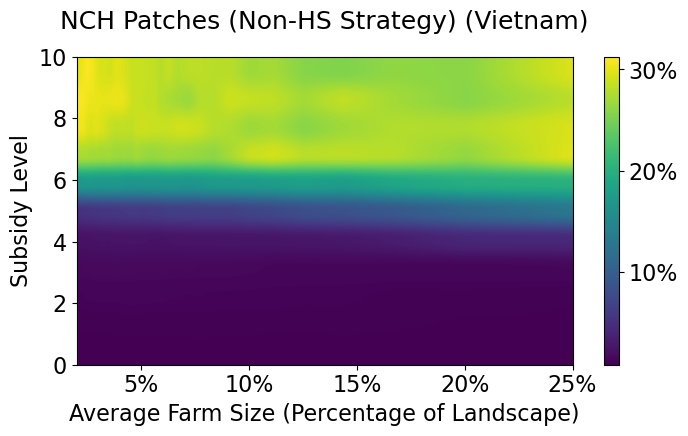

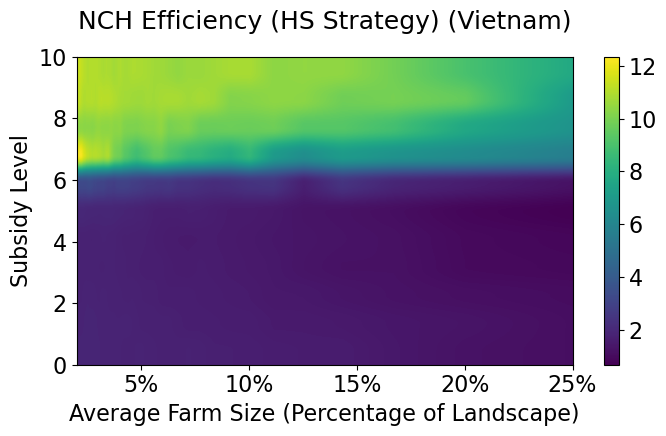

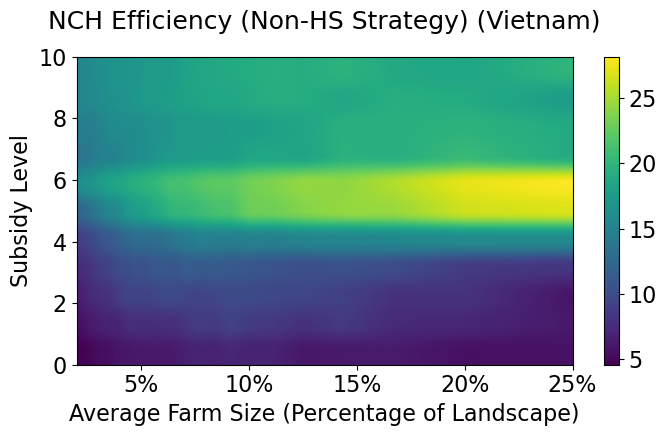

In [45]:

import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

subsidy_max=10

country = "Vietnam"

for i in range(len(metrics_extended)):

    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        temp.loc[subsidy]=data[country][subsidy].loc[i].astype('float64').tolist()

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()

    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=0.01)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), subsidy_max+1)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    # ADJUST FIGURE SIZE
    plt.figure(figsize=[8,4])

    #ADJUST HEATMAP COLORS
    # im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
    #               aspect='auto', cmap='your chosen color map')
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                  aspect='auto')
    cbar = plt.colorbar(im)

    # ADJUST FIGURE TEXT
    plt.title(metrics_extended[i] +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Average Farm Size (Percentage of Landscape)")
    plt.ylabel("Subsidy Level")
    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percentage))
    if i in set_percent_inds:
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.savefig(join(directory, 'Figures', country+'_heatmaps', metrics_extended[i]+'.png'), dpi=600, bbox_inches='tight')

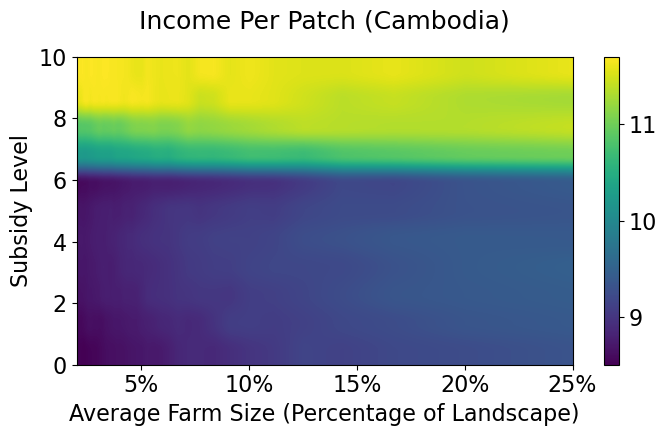

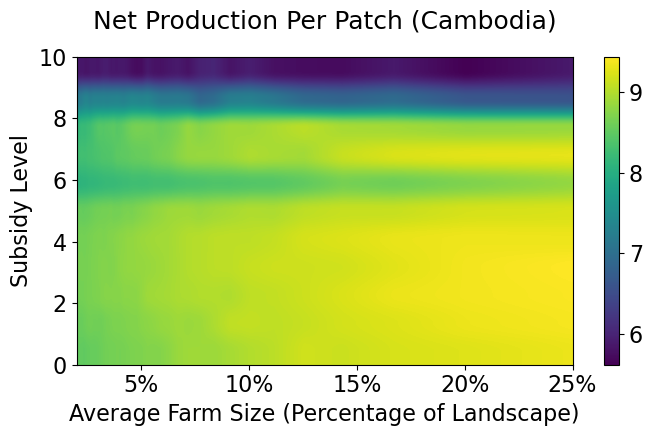

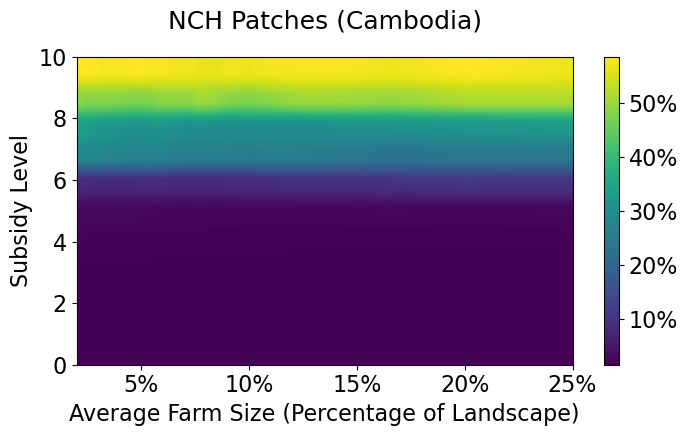

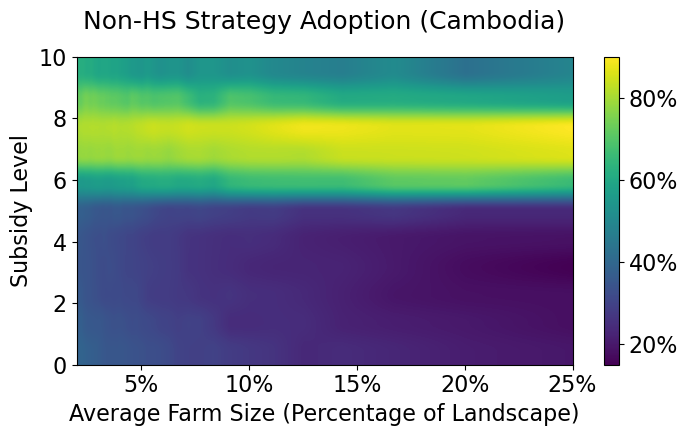

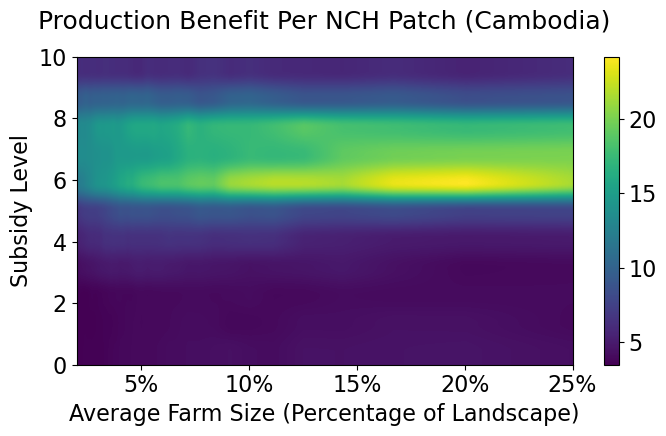

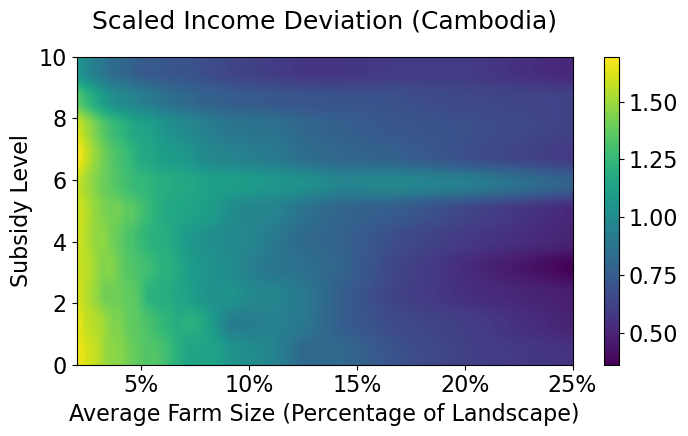

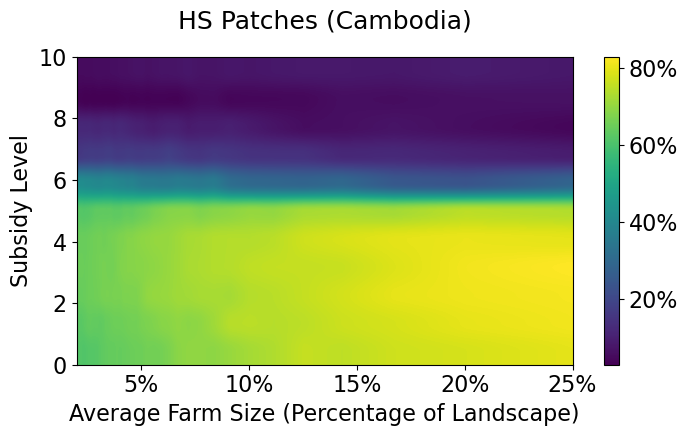

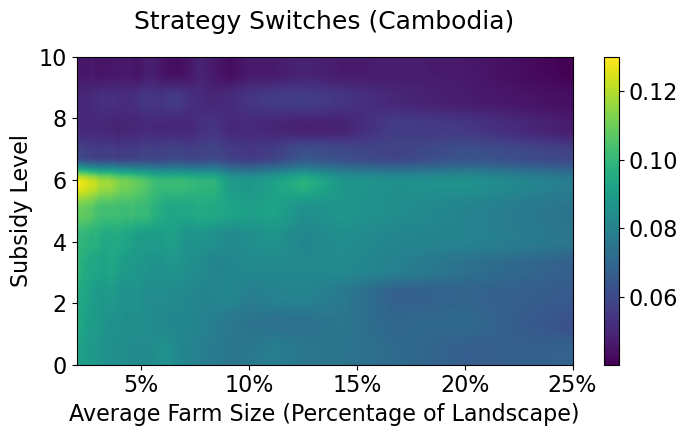

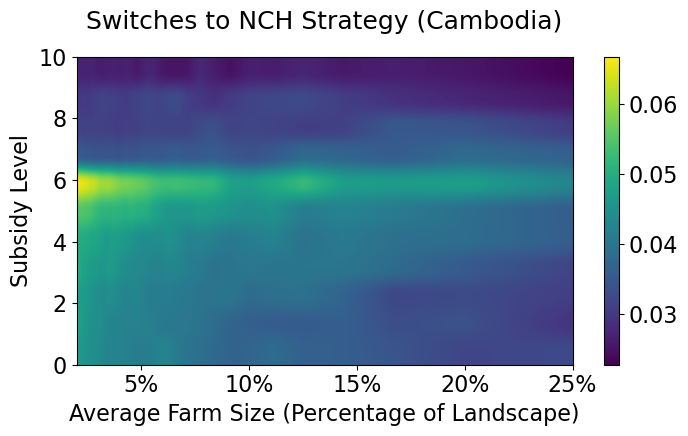

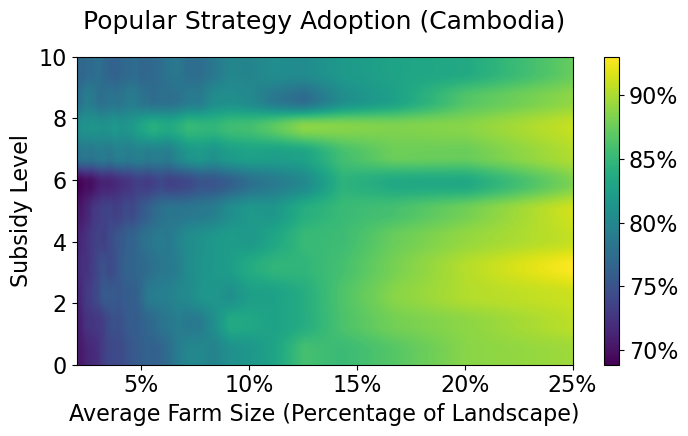

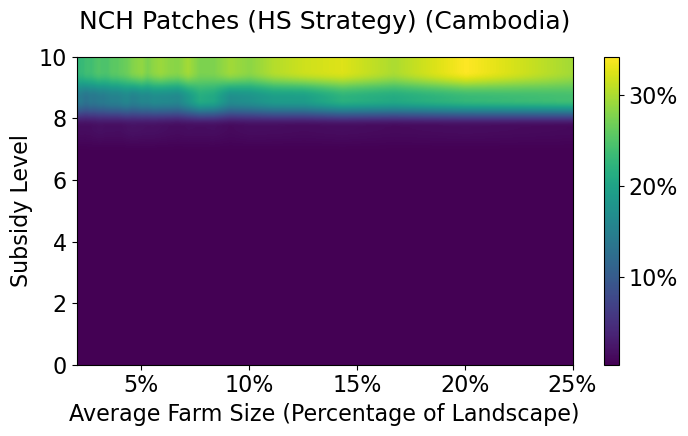

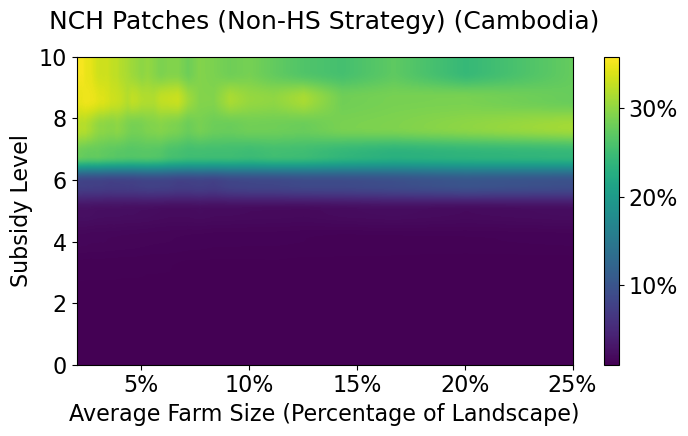

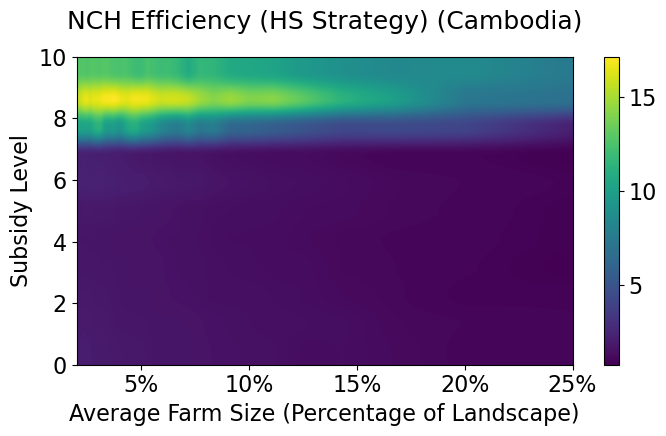

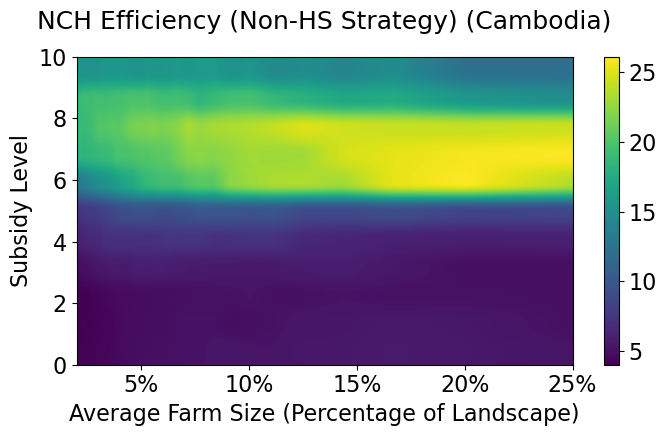

In [46]:

import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

subsidy_max=10

country = "Cambodia"

for i in range(len(metrics_extended)):

    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        temp.loc[subsidy]=data[country][subsidy].loc[i].astype('float64').tolist()

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()

    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=0.01)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), subsidy_max+1)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    # ADJUST FIGURE SIZE
    plt.figure(figsize=[8,4])  
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                  aspect='auto')
    cbar = plt.colorbar(im)

    # ADJUST FIGURE TEXT
    plt.title(metrics_extended[i] +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Average Farm Size (Percentage of Landscape)")
    plt.ylabel("Subsidy Level")
    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percentage))
    if i in set_percent_inds:
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.savefig(join(directory, 'Figures', country+'_heatmaps', metrics_extended[i]+'.png'), dpi=600, bbox_inches='tight')

# cleaning for Stata non-parametric regression

In [40]:
df=pd.read_csv(join(directory, sensitivity_folder, 'farm_size_analysis.csv'))

subsidy_max=10

ols_df=dict()
country = "Vietnam"
ols_df[country]=list()

temp=pd.DataFrame(columns=df.columns)
temp.insert(1, 'subsidy', [])
for subsidy in range(subsidy_max+1):
    ols_df[country].append(temp.copy())

start_ind = 0
for i in range(len(df)):
    temp=df.iloc[i, 8:].tolist()
    for j in range(len(temp)):
        temp[j]=temp[j][1:-1].split(" ")
    temp=np.array(temp)

    for subsidy in range(subsidy_max+1):
        temp2=np.concatenate((np.array(df.iloc[i, :8]), temp[:, subsidy]))
        temp2=np.insert(temp2, 1, subsidy)
        ols_df[country][subsidy].loc[i]=temp2

    if df['country'].iloc[i+1]!=country:
        start_ind = i+1
        break

country = "Cambodia"
ols_df[country]=list()

temp=pd.DataFrame(columns=df.columns)
temp.insert(1, 'subsidy', [])
for subsidy in range(subsidy_max+1):
    ols_df[country].append(temp.copy())

for i in range(start_ind, len(df)):
    temp=df.iloc[i, 8:].tolist()
    for j in range(len(temp)):
        temp[j]=temp[j][1:-1].split(" ")
    temp=np.array(temp)

    for subsidy in range(subsidy_max+1):
        temp2=np.concatenate((np.array(df.iloc[i, :8]), temp[:, subsidy]))
        temp2=np.insert(temp2, 1, subsidy)
        ols_df[country][subsidy].loc[i]=temp2

df=pd.DataFrame(columns=ols_df[country][0].columns)
for country in countries:
    for subsidy in range(subsidy_max+1):
        df=pd.concat([df, ols_df[country][subsidy]])
    
# adding calculation for HS strategy
df.insert(16, 'listHSStrategy', 1-df['listNCHStrategy'].astype('float64'))

In [44]:
col_list=df.columns[:9].tolist()

# Stata column title need to be short and have no spaces
metrics_stata=['Income', 'Net_Prod', 'NCH_Patches', 'NCH_Strategy', 'NCH_Efficiency', 'Income_Dev', 'HS_Patches', 'HS_Strategy']

for i in metrics_stata:
    col_list.append(i)

df=df.iloc[:, :17]
df.columns=col_list

In [46]:
selected_columns = df.iloc[:, [1, 2] + list(range(9, df.shape[1]))]
selected_columns

subsidy farmSize              Income           Net_Prod  \
0          0     0.02   8.468355555555556  8.468355555555556   
1          0     0.02   8.173866666666669  8.173866666666669   
2          0     0.02   8.649333333333333  8.649333333333333   
3          0     0.02   8.520800000000001  8.520800000000001   
4          0     0.02   8.166222222222222  8.166222222222222   
...      ...      ...                 ...                ...   
4695      10     0.25  11.690666666666669   5.45422222222222   
4696      10     0.25  12.690666666666683  8.428444444444446   
4697      10     0.25  10.639555555555564  4.098222222222219   
4698      10     0.25  11.003111111111112   5.04133333333333   
4699      10     0.25  10.924622222222228  5.091733333333336   

               NCH_Patches         NCH_Strategy      NCH_Efficiency  \
0      0.01431111111111111   0.3808000000000001  2.6241770525489696   
1     0.014755555555555553  0.42760000000000004   4.049486461251167   
2                   0.0144   0.2719999999999999    3.08718032103398   
3     0.014933333333333333   0.3660000000000002   3.280803136182703   
4      0.01591111111111111  0.36240000000000017  7.0440070767905105   
...                    ...                  ...                 ...   
4695    0.6236444444444442   0.9250000000000005  5.4612891222252955   
4696    0.4262222222222224   0.9950000000000006  12.928663003662987   
4697    0.6541333333333333                    0  2.0153271028037394   
4698    0.5961777777777781                    0  3.5289790660225404   
4699     0.583288888888889                    0  3.3891295938104484   

              Income_Dev            HS_Patches  HS_Strategy  
0     1.8647422344827584    0.6154666666666667       0.6192  
1      1.950413544827586    0.5504888888888885       0.5724  
2     1.4583824709359603    0.6609777777777777       0.7280  
3     1.8574998712643669    0.6215111111111112       0.6340  
4     1.8285804492610838    0.5450666666666665       0.6376  
...                  ...                   ...          ...  
4695  0.3097671791039463  0.018488888888888888       0.0750  
4696  0.8791109187925827  8.888888888888889E-5       0.0050  
4697  0.5500299085151301   0.19555555555555573       1.0000  
4698  0.7893720479082319                  0.16       1.0000  
4699  0.6964138644772699   0.18666666666666681       1.0000  

[51700 rows x 10 columns]

In [47]:
selected_columns[:start_ind*11].to_csv(join(directory, sensitivity_folder, "Clean Data", "farm_size_vietnam.csv"), index=False)

In [48]:
selected_columns[start_ind*11:].to_csv(join(directory, sensitivity_folder, "Clean Data", "farm_size_cambodia.csv"), index=False)

In [49]:
selected_columns.to_csv(join(directory, sensitivity_folder, "Clean Data", "farm_size.csv"), index=False)

# outputting scaled values for Stata non-parametric regression (which is what was used) to "Scaled" folder in "Clean Data" folder

In [50]:

scaler = StandardScaler()
for i in range(2):
    selected_columns.iloc[:, i]/=max(selected_columns.iloc[:, i])
for j in range(2, selected_columns.shape[1]):
    temp=selected_columns.iloc[:, j].values.reshape(-1, 1)
    temp=scaler.fit_transform(temp)
    selected_columns.iloc[:, j]=temp

In [52]:
selected_columns[:start_ind*11].to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "farm_size_vietnam_scaled.csv"), index=False)

In [53]:
selected_columns[start_ind*11:].to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "farm_size_cambodia_scaled.csv"), index=False)

In [54]:
selected_columns.to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "farm_size_scaled.csv"), index=False)

# trimming out disconnected range for regression analysis

In [55]:
trimmed_vietnam=pd.read_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "farm_size_vietnam_scaled.csv"))
trimmed_vietnam=trimmed_vietnam[trimmed_vietnam['subsidy']<=0.7]
trimmed_vietnam.to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled_trimmed", "farm_size_vietnam_scaled.csv"), index=False)

trimmed_cambodia=pd.read_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "farm_size_cambodia_scaled.csv"))
trimmed_cambodia=trimmed_cambodia[trimmed_cambodia['subsidy']<=0.8]
trimmed_cambodia.to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled_trimmed", "farm_size_cambodia_scaled.csv"), index=False)

# OLS regression analysis (trimmed)

In [10]:
import numpy as np
import statsmodels.api as sm

x_ind=1
results=dict()

for country in countries:
    results[country]=[list() for _ in range(3)]
    df=pd.read_csv(join(directory, sensitivity_folder, 'Clean Data', 'Scaled_trimmed', 'farm_size_'+country.lower()+'_scaled.csv'))
    for i in range(len(metrics)):
        X=df.iloc[:, [0, x_ind]]
        X[df.columns[x_ind]+'*subsidy']=df.iloc[:, [0, x_ind]].prod(axis=1)
        X=sm.add_constant(X)
        model = sm.OLS(df.iloc[:, i+2], X).fit()
        
        print()
        print('Metric: ', metrics[i], ', ', country)
        print(model.summary())

        coefficients = model.params
        standard_errors = model.bse
        p_values = model.pvalues

        results[country][0].append(coefficients)
        results[country][1].append(standard_errors)
        results[country][2].append(p_values)

        results_as_html = model.summary().tables[1].as_html()
        results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

        results_df.to_excel(join(directory, sensitivity_folder, "Clean Data", "Regression Tables", "farm_size_"+country+"_"+metrics_title[i]+".xlsx"))


Metric:  Income Per Patch ,  Vietnam
                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     7146.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:51:01   Log-Likelihood:                -9921.6
No. Observations:               18800   AIC:                         1.985e+04
Df Residuals:                   18796   BIC:                         1.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
co

In [8]:
# outputting OLS values formatted to * p-value format
vals=['S', 'F', 'FS']

store=[]

for country in ['Vietnam', 'Cambodia']:
    df=pd.DataFrame(columns=metrics)
    for i in range(len(results[country][0])):
        temp=[]
        for j in range(1, 4):
            coeff="{:.3f}".format(round(results[country][0][i][j], 3))
            p=round(results[country][2][i][j], 5)
            # if p<0.01:
            #     coeff+="***"
            # elif p<0.05:
            #     coeff+="**"
            # elif p<0.1:
            #     coeff+="*"
            if p>0.001:
                coeff+='ns'
            temp.append(coeff)
            temp.append('('+str("{:.3f}".format(round(results[country][1][i][j], 3)))+')')
        df[metrics[i]]=temp
    df = df.astype(str)
    df.to_csv(join(directory, regression_folder, "formatted_size_"+country+".csv"))
    store.append(df)
store[0]

Income Per Patch Net Production Per Patch NCH Patches (%)  \
0            1.734                   -0.231           1.600   
1          (0.020)                  (0.018)         (0.014)   
2            0.924                    1.081        -0.054ns   
3          (0.028)                  (0.025)         (0.020)   
4          0.019ns                   -0.454           0.429   
5          (0.067)                  (0.059)         (0.047)   

  Non-HS Strategy (%) Production Benefit Per NCH Patch Income Deviation  \
0               1.125                            1.746           -2.159   
1             (0.029)                          (0.041)          (0.032)   
2              -1.592                          0.079ns           -3.783   
3             (0.041)                          (0.057)          (0.045)   
4               4.167                            2.650            2.087   
5             (0.098)                          (0.135)          (0.108)   

  HS Patches (%) HS Strategy (%)  
0         -1.209          -1.125  
1        (0.024)         (0.029)  
2          1.331           1.592  
3        (0.033)         (0.041)  
4         -3.521          -4.167  
5        (0.079)         (0.098)